In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

# Keep only the required columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']


In [8]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning
df['cleaned_message'] = df['message'].apply(clean_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_message'])

# Label encoding
y = df['label'].map({'ham': 0, 'spam': 1})

# Check dimensions
print("TF-IDF shape:", X.shape)


TF-IDF shape: (5572, 3000)


[nltk_data] Downloading package stopwords to C:\Users\SANJEEV
[nltk_data]     R\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



📊 Naive Bayes Accuracy: 0.9785
📝 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



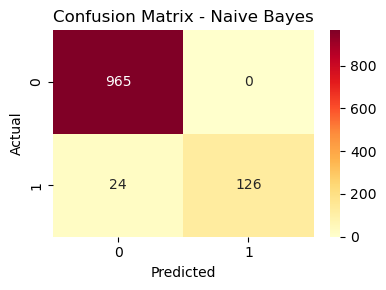


📊 Logistic Regression Accuracy: 0.9525
📝 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



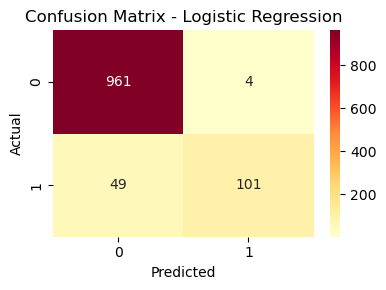


📊 SVM Accuracy: 0.9803
📝 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



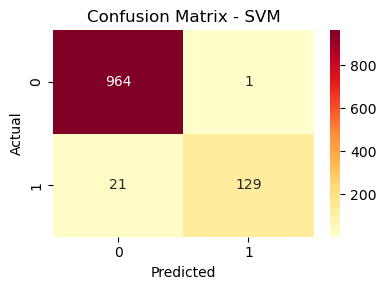

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n📊 {name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("📝 Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


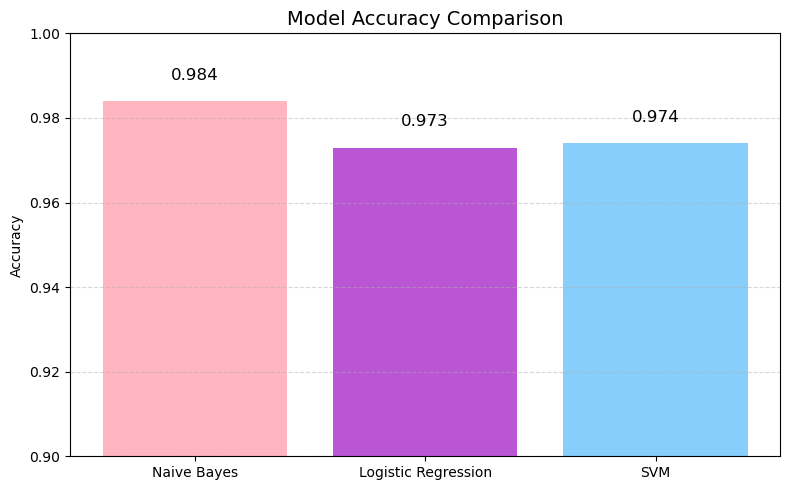

In [10]:
import matplotlib.pyplot as plt

# Sample accuracy scores (replace with your actuals if different)
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [0.984, 0.973, 0.974]  # Example scores

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['#FFB6C1', '#BA55D3', '#87CEFA'])
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f"{yval:.3f}", ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


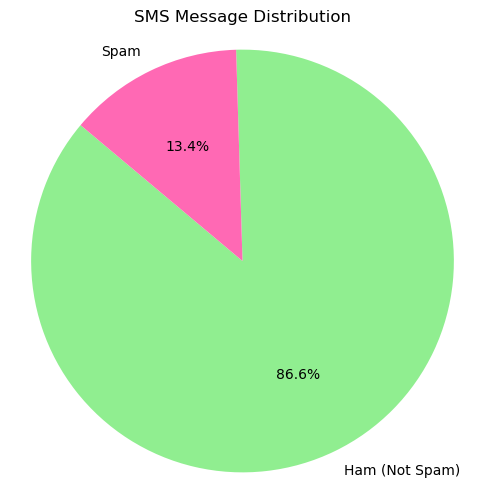

In [11]:
# Pie chart of class distribution
labels = ['Ham (Not Spam)', 'Spam']
sizes = df['label'].value_counts()
colors = ['#90EE90', '#FF69B4']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("SMS Message Distribution")
plt.axis('equal')  # Equal aspect ratio = circle
plt.show()


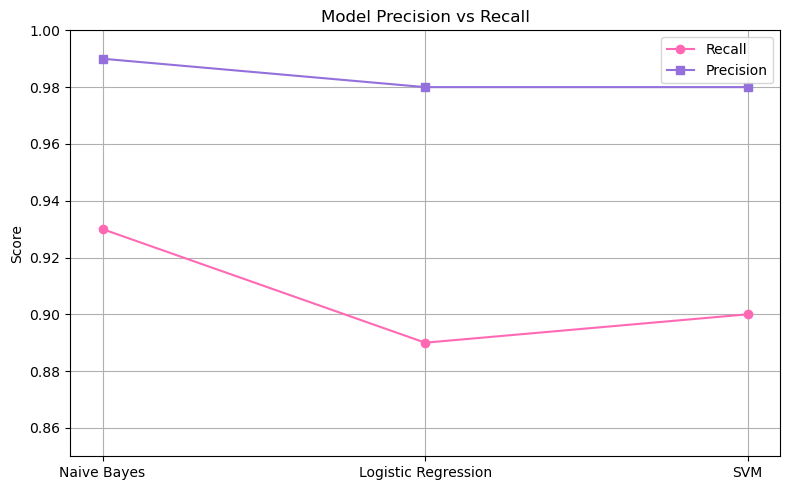

In [12]:
# Optional line chart for visual comparison of metrics
import numpy as np

recall = [0.93, 0.89, 0.90]
precision = [0.99, 0.98, 0.98]

x = np.arange(len(models))

plt.figure(figsize=(8, 5))
plt.plot(x, recall, label='Recall', marker='o', color='#FF69B4')
plt.plot(x, precision, label='Precision', marker='s', color='#9370DB')

plt.xticks(x, models)
plt.ylabel('Score')
plt.ylim(0.85, 1.0)
plt.title('Model Precision vs Recall')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure your models are trained and you have predictions for each
# Assuming these are already done:
# model_nb, model_lr, model_svm
# y_pred_nb, y_pred_lr, y_pred_svm

# Define model names and predictions
model_names = ['Naive Bayes', 'Logistic Regression', 'SVM']
predictions = [
    model_nb.predict(X_test),
    model_lr.predict(X_test),
    model_svm.predict(X_test)
]

# Plot heatmaps
for name, y_pred in zip(model_names, predictions):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


NameError: name 'model_nb' is not defined

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Split again if not already
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train each model
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

model_svm = LinearSVC()
model_svm.fit(X_train, y_train)


LinearSVC()

In [15]:
# Predictions
y_pred_nb = model_nb.predict(X_test)
y_pred_lr = model_lr.predict(X_test)
y_pred_svm = model_svm.predict(X_test)


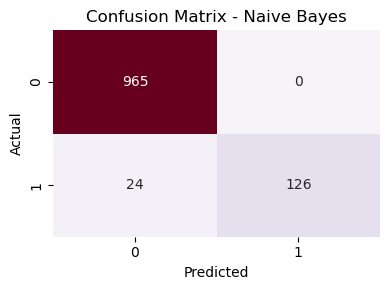

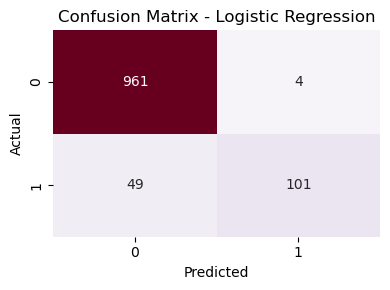

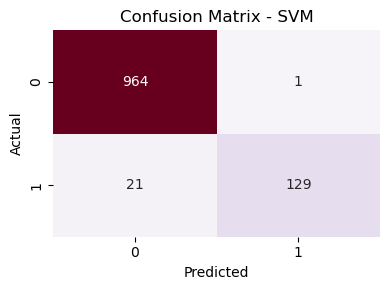

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Data for plotting
model_names = ['Naive Bayes', 'Logistic Regression', 'SVM']
predictions = [y_pred_nb, y_pred_lr, y_pred_svm]

# Plot heatmaps
for name, y_pred in zip(model_names, predictions):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
